In [ ]:
!pip install opencv-python

In [ ]:
import os, cv2, itertools
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LogisticRegressionCV
import matplotlib.pyplot as plt 

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cat="/content/drive/My Drive/training_set/training_set/cats/"
dog="/content/drive/My Drive/training_set/training_set/dogs/"
cat_test="/content/drive/My Drive/test_set/test_set/cats/"
dog_test="/content/drive/My Drive/test_set/test_set/dogs/"

In [ ]:
ROWS=64
COLS=64
CHANNELS=3

In [ ]:
cat_train_images = [cat+i for i in os.listdir(cat)]
dog_train_images=[dog+i for i in os.listdir(dog)]
cat_test_images=[cat_test+i for i in os.listdir(cat_test)]
dog_test_images=[dog_test+i for i in os.listdir(dog_test)]
train_images=[]
test_images=[]
for i in cat_train_images:
  train_images.append(i)
for j in dog_train_images:
  train_images.append(j)

for i in cat_test_images:
  test_images.append(i)
for j in dog_test_images:
  test_images.append(j)

test_images

['/content/drive/My Drive/test_set/test_set/cats/cat.4021.jpg',
 '/content/drive/My Drive/test_set/test_set/cats/cat.4019.jpg',
 '/content/drive/My Drive/test_set/test_set/cats/cat.4018.jpg',
 '/content/drive/My Drive/test_set/test_set/cats/cat.4017.jpg',
 '/content/drive/My Drive/test_set/test_set/cats/cat.4020.jpg',
 '/content/drive/My Drive/test_set/test_set/cats/cat.4016.jpg',
 '/content/drive/My Drive/test_set/test_set/cats/cat.4015.jpg',
 '/content/drive/My Drive/test_set/test_set/cats/cat.4014.jpg',
 '/content/drive/My Drive/test_set/test_set/cats/cat.4013.jpg',
 '/content/drive/My Drive/test_set/test_set/cats/cat.4012.jpg',
 '/content/drive/My Drive/test_set/test_set/cats/cat.4011.jpg',
 '/content/drive/My Drive/test_set/test_set/cats/cat.4010.jpg',
 '/content/drive/My Drive/test_set/test_set/cats/cat.4008.jpg',
 '/content/drive/My Drive/test_set/test_set/cats/cat.4009.jpg',
 '/content/drive/My Drive/test_set/test_set/cats/cat.4007.jpg',
 '/content/drive/My Drive/test_set/test_

In [ ]:
def read_image(file_path):
  img=cv2.imread(file_path,cv2.IMREAD_COLOR)
  return cv2.resize(img,(ROWS,COLS),interpolation=cv2.INTER_CUBIC)

In [ ]:
def prep_data(images):
  m=len(images)
  n_x=ROWS*COLS*CHANNELS

  X=np.ndarray((n_x,m),dtype=np.uint8)
  y=np.zeros((1,m))
  print("Shape of X is : {}".format(X.shape))

  for i,image_file in enumerate(images) :
    image = read_image(image_file)
    X[:,i] = np.squeeze(image.reshape((n_x,1)))
    if 'dog' in image_file.lower() :
      y[0,i] = 1
    elif 'cat' in image_file.lower() :
      y[0,i] = 0
    else :
      y[0,i] = image_file.split('/')[-1].split('.')[0]
      
    if i%5000 == 0 :
      print("Proceed {} of {}".format(i, m))
    
  return X,y

In [ ]:
X_train, y_train = prep_data(train_images)
X_test, test_idx = prep_data(test_images)

Shape of X is : (12288, 445)
Proceed 0 of 445
Shape of X is : (12288, 106)
Proceed 0 of 106


In [ ]:
classes = {0: 'cats',1: 'dogs'}

In [ ]:
def show_images(X, y, idx) :
  image = X[idx]
  image = image.reshape((ROWS, COLS, CHANNELS))
  plt.figure(figsize=(4,2))
  plt.imshow(image)
  plt.title("This is a {}".format(classes[y[idx,0]]))
  plt.show()

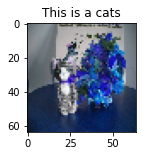

In [ ]:
show_images(X_train.T, y_train.T, 2)

In [ ]:
clf = LogisticRegressionCV()

In [ ]:
X_train_lr, y_train_lr = X_train.T, y_train.T.ravel()

In [ ]:
clf.fit(X_train_lr, y_train_lr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [ ]:
print("Model accuracy: {:.2f}%".format(clf.score(X_test.T, test_idx.T.ravel())*100))

Model accuracy: 65.09%


In [ ]:
def show_image_prediction(X, idx, model) :
  image = X[idx].reshape(1,-1)
  image_class = classes[model.predict(image).item()]
  image = image.reshape((ROWS, COLS, CHANNELS))
  plt.figure(figsize = (4,2))
  plt.imshow(image)
  plt.title("Test {} : I think this is {}".format(idx, image_class))
  plt.show()

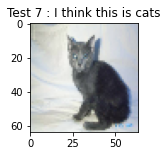

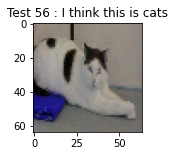

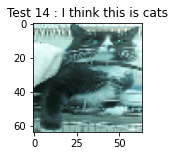

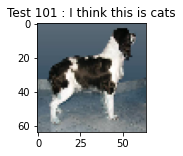

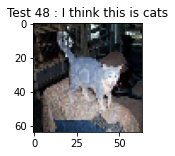

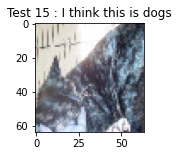

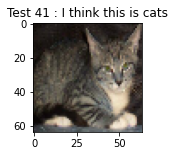

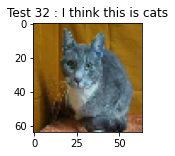

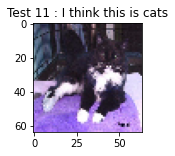

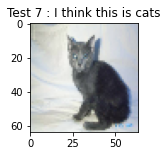

In [ ]:
X_test_lr, test_idx = X_test.T, test_idx.T

for i in np.random.randint(0, len(X_test_lr), 10) :
  show_image_prediction(X_test_lr, i, clf)